## Iris dataset
**It contains measurements of different parts of the iris flower, including the sepal length, sepal width, petal length, and petal width, as well as the corresponding species label for each observation. There are 150 observations in total, with 50 observations for each of the three iris species: setosa, versicolor, and virginica.**

This cell imports the load_iris() function from the sklearn.datasets module and uses it to load the Iris dataset which is mentioned above. The data is stored in the iris variable as a dictionary-like object with keys for the data (iris.data), target labels (iris.target), and other information about the dataset (iris.DESCR). Take a note of all the keys displayed below which constitute information about iris dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- These are the features of each datapoint in the Iris dataset, which are length and width of petal and sepal
- We will be training our model on these features combinedly to predict an unknown datapoint to which class it belongs

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- These are the names of classes in the Iris dataset
- Each datapoint belongs to any one of the class
- Our job is to train the model so that an unknown datapoint can be labeled based on its features

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Since we cannot plot all 4 features simultaneously in 4D space, we plot two graphs with 2 features at a time<br/>**
Scatter plot of datapoints with respective 2 features namely
 - Sepal Length
 - Sepal Width

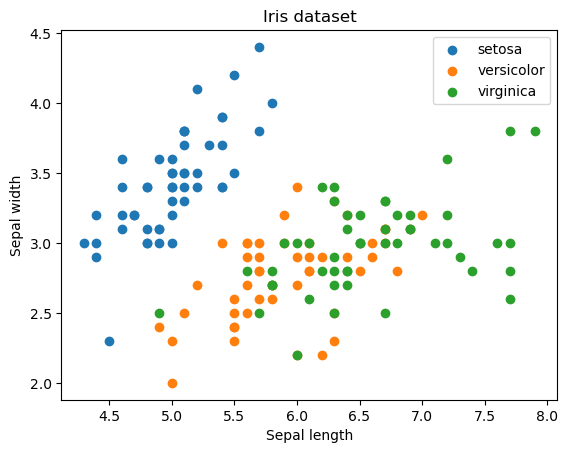

In [5]:
import matplotlib.pyplot as plt

# Plot each class with different colors
for i in range(iris.target_names.shape[0]):
    plt.scatter(iris.data[iris.target==i, 0], iris.data[iris.target==i, 1], label=iris.target_names[i])

# Set plot labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

# Show plot
plt.legend()
plt.show()

Scatter plot of datapoints with respective 2 features namely
 - Petal Length
 - Petal Width

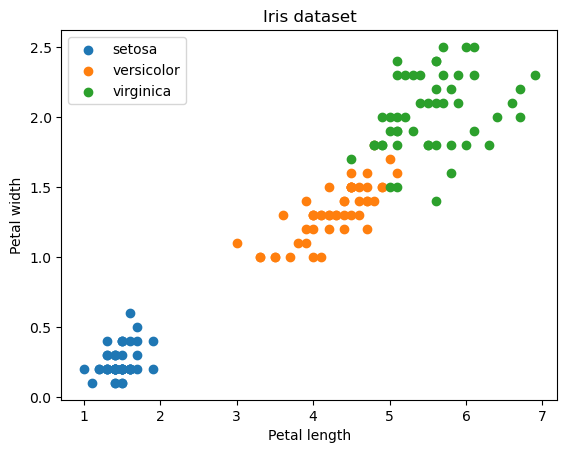

In [6]:
# Plot each class with different colors
for i in range(iris.target_names.shape[0]):
    plt.scatter(iris.data[iris.target==i, 2], iris.data[iris.target==i, 3], label=iris.target_names[i])

# Set plot labels
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris dataset')

# Show plot
plt.legend()
plt.show()

## Decision tree
**A decision tree is a tree-like structure used in machine learning to make decisions based on data. Each branch of the tree represents a decision based on a feature, and each leaf represents a conclusion or prediction. The goal is to create a model that can accurately predict outcomes for new data based on past patterns.**

- We generally do the testing and training on the same dataset by dividing the dataset into two parts.
- The benchmark ratio is 80% of dataset is splitted to training data and 20% into testing dataset.
- This helps us to evaluate the model immediately once it is trained.
- We can modify the model or parameters accordingly based on the test performance

This cell uses the train_test_split function from scikit-learn's model_selection module to split the iris dataset into training and testing sets. The input data iris.data contains the features of the dataset and iris.target contains the corresponding target variable. The test_size parameter specifies the proportion of the dataset to include in the testing set, and random_state is used to ensure reproducibility of the split. The function returns four arrays: X_train (training set features), X_test (testing set features), y_train (training set target variable), and y_test (testing set target variable). These arrays are used for model training and evaluation.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

This code trains a decision tree classifier on the training set X_train and y_train using the DecisionTreeClassifier class from the Scikit-learn library. The resulting trained model is stored in the model variable.

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In machine learning, after training a model on a dataset, we need to evaluate its performance on unseen data. The y_pred variable contains the predicted labels for the test set, which we can compare against the actual labels in y_test to measure the accuracy of the model. The predicted labels are generated by passing the test set features X_test to the trained model model using the predict() method.

In [9]:
y_pred = model.predict(X_test)

The code is using the accuracy_score function from sklearn.metrics to calculate the accuracy of the predictions made by the model. accuracy_score takes two arguments: the true labels of the test data (y_test) and the predicted labels (y_pred) generated by the model. It returns a floating-point number between 0 and 1, indicating the fraction of correctly classified samples in the test set. The code then prints out the accuracy score.

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


This cell contains a code snippet to visualize the trained model and interpret how the model is working

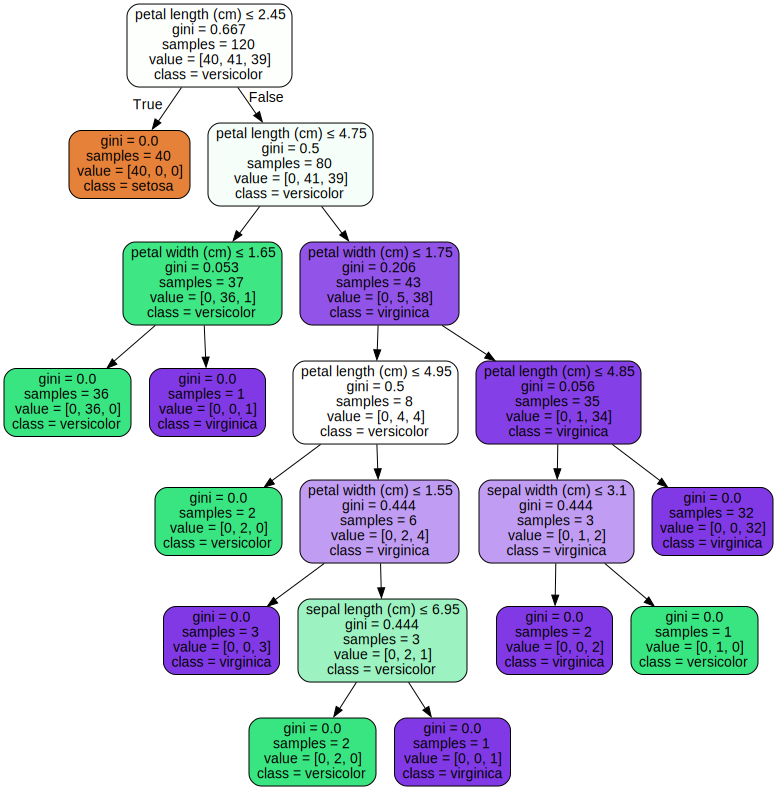

In [11]:
from sklearn.tree import export_graphviz
from IPython.display import display
from graphviz import Source
dot_data = export_graphviz(model, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = Source(dot_data)
display(graph)

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('trainingTestingDataset.csv')

# Separate the features and target variable
y = df['label']
df.drop(['RCLS_GEOL'], axis=1)
X = df.iloc[:, 1:19]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Use the trained classifier to predict the classes of the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9574468085106383
